Om

In [1]:
import pandas as pd


In [2]:
#loading the dataset into a pandas data fram
data = pd.read_csv('/content/Financial_Fraud_Main.csv')


In [3]:
# Checking the first few rows
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
#Understanding the dataset
# Check data types and if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634881 entries, 0 to 634880
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            634593 non-null  float64
 1   type            634593 non-null  object 
 2   amount          634593 non-null  float64
 3   nameOrig        634593 non-null  object 
 4   oldbalanceOrg   634593 non-null  float64
 5   newbalanceOrig  634593 non-null  float64
 6   nameDest        634593 non-null  object 
 7   oldbalanceDest  634593 non-null  float64
 8   newbalanceDest  634593 non-null  float64
 9   isFraud         634593 non-null  float64
 10  isFlaggedFraud  634593 non-null  float64
dtypes: float64(8), object(3)
memory usage: 53.3+ MB


In [5]:
# Descriptive statistics
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,634593.000000,6.345930e+05,6.345930e+05,6.345930e+05,6.345930e+05,6.345930e+05,634593.000000,634593.0
mean,15.729920,1.475220e+05,8.112946e+05,8.275246e+05,1.641326e+06,1.794799e+06,0.000388,0.0
std,5.272509,2.574780e+05,2.861377e+06,2.897304e+06,2.928860e+06,3.016602e+06,0.019685,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,12.000000,1.499602e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,16.000000,5.159395e+04,2.216700e+04,3.253230e+03,2.389002e+05,3.581086e+05,0.000000,0.0
75%,19.000000,1.978900e+05,1.152208e+05,1.467779e+05,1.633809e+06,2.020440e+06,0.000000,0.0
max,35.000000,1.000000e+07,3.890000e+07,3.890000e+07,4.150000e+07,4.150000e+07,1.000000,0.0


In [6]:
#Data Cleaning
# Checking for missing values in each column
missing_data = data.isnull().sum()

# Displayin  columns with missing data
print(missing_data[missing_data > 0])

step              288
type              288
amount            288
nameOrig          288
oldbalanceOrg     288
newbalanceOrig    288
nameDest          288
oldbalanceDest    288
newbalanceDest    288
isFraud           288
isFlaggedFraud    288
dtype: int64


There is only one missing value in the column is flagged fraud

In [7]:
!pip install seaborn


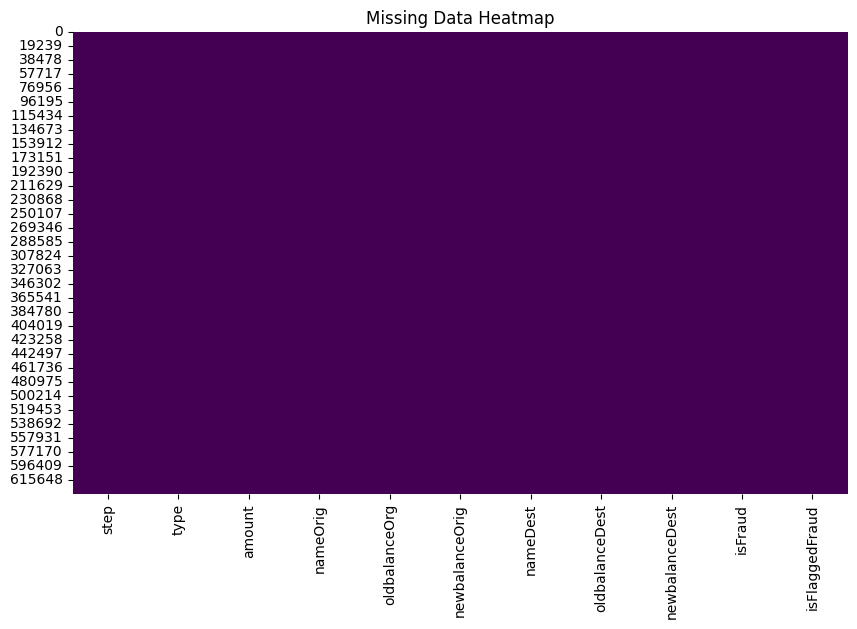

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [9]:
#I decided to remove the row
data.dropna(subset=['isFlaggedFraud'], inplace=True)


In [10]:
# Checking for missing values in each column
missing_data1 = data.isnull().sum()

# Displayin  columns with missing data
print(missing_data1[missing_data > 0])

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [11]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [12]:
all_Data = data.size
print(all_Data)

6980523


In [13]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [14]:
data['type'].value_counts()

,count
type,
CASH_OUT,272227
PAYMENT,187964
CASH_IN,124046
TRANSFER,46202
DEBIT,4154


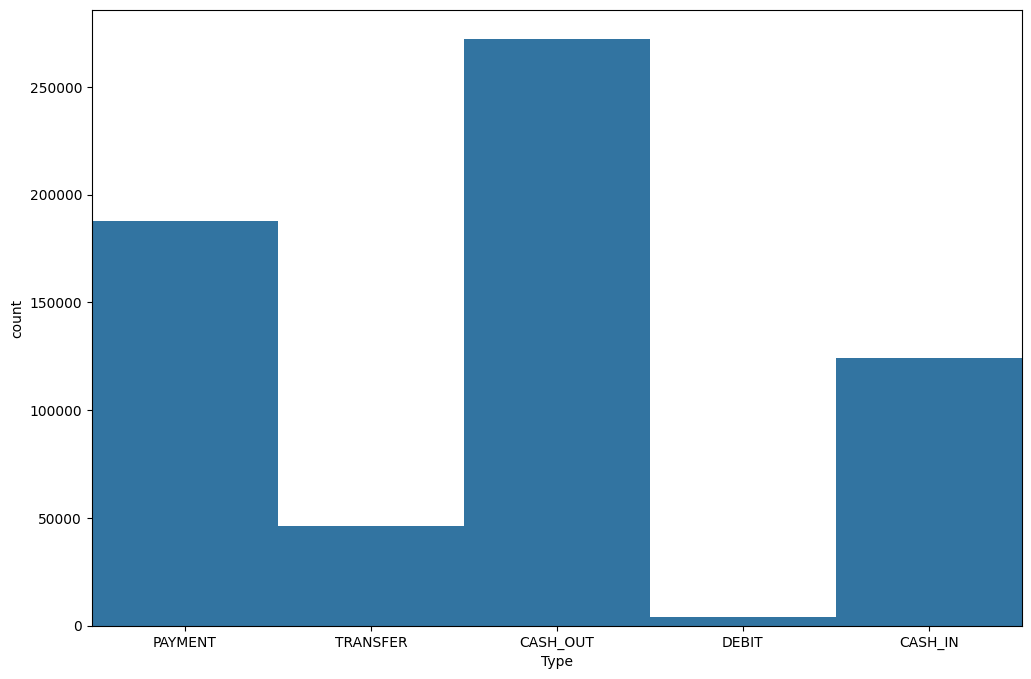

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x="type", width= 1)
plt.xlabel('Type')
plt.show()

In [16]:
#Here I am trying to Merge another dataset
data2 = pd.read_csv('/content/creditcard.csv')

In [17]:
data2.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [18]:
#Here the common features are amount ,fraud label but in the 2nd dataset it is names ad Class and transaction time

Here there will be a probl;em in merging on amount colum because Amount is formatted as float in 2ns dataset and int in the first ,So first lets check the data types for the amount colum in both datasets ,As they are different lets convert it into same type .

In [19]:
data2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
data.dtypes

,0
step,float64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,float64


In [21]:
data2.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [22]:
#See here the class is int and is fraud is float

In [23]:
#trying to convert int into float
data2['Class'] = data2['Class'].astype(float)


In [24]:
data2.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [25]:
#Trying to merge
# Step 1: Renaming Class column to 'isFraud' in the second dataset to align with the first dataset
data2.rename(columns={'Class': 'isFraud'}, inplace=True)



In [26]:
# Step 2: Merging the datasets on 'Amount' and 'isFraud' (fraud label)
#Trail_merged_data = pd.merge(data, data2, on=['Amount', 'isFraud'], how='inner')


I got an error because there is significant difference in the scale of the amopunt values between the datasets like the 1st one amount is ranging from 0.1 to 10,000,000 ,on the other hand Amount is ranging from 0 to 25k.This difference is indicating that they represent diff context or scale transactions ,so even if we merge the dataset it will be less effective .

So Now Lets normalize the AMount colums ,As the goal is to compare based on relative amountwe can try normalizing both columns like scaling them between 0 and 1 before merging

Or

We can use other feature to merge the fraud labels like is raud

In [27]:
from sklearn.preprocessing import MinMaxScaler


In [28]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [29]:
# Normalize the 'amount' column in the first dataset
data['amount_normalized'] = scaler.fit_transform(data[['amount']])


In [30]:
# Normalize the 'Amount' column in the second dataset
data2['Amount_normalized'] = scaler.fit_transform(data2[['Amount']])


In [31]:
# Perform the merge on 'amount_normalized' and 'isFraud'
merged_data = pd.merge(data, data2, left_on=['amount_normalized', 'isFraud'], right_on=['Amount_normalized', 'isFraud'], how='inner')


In [32]:
# Check the merged dataset
merged_data.head(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_normalized
0,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0.0
1,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0.0
2,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0.0
3,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0.0
4,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,0.001241,0.154170,-0.141533,0.384610,-0.147132,-0.087100,0.101117,0.077944,0.0,0.0
5,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,-0.139920,-0.399563,0.010200,0.992235,0.457015,-0.027924,0.045273,0.028868,0.0,0.0
6,17.0,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,...,-0.001757,0.097379,-0.324050,0.436521,0.509674,0.454116,-0.201804,-0.175439,0.0,0.0


In [33]:
# Drop the normalized columns and any other unnecessary columns
merged_data_cleaned = merged_data.drop(columns=['amount_normalized', 'Amount_normalized', 'amount', 'Amount'])

# Check the cleaned dataset
merged_data_cleaned.head()


,step,type,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,-1.547440,-0.133602,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401
1,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,-1.124025,0.065979,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379
2,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,-0.720726,-0.006716,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986
3,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,1.165893,0.320450,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739
4,17.0,PAYMENT,C938188576,0.0,0.0,M1481535853,0.0,0.0,0.0,0.0,...,-0.681539,-0.057886,0.001241,0.154170,-0.141533,0.384610,-0.147132,-0.087100,0.101117,0.077944


In [34]:
#Handling missing data
# Check for missing values in the dataset
missing_data = merged_data.isnull().sum()

# Display columns with missing values
print(missing_data[missing_data > 0])


Series([], dtype: int64)


Lets start EDA

In [35]:
# Check the overall structure of the dataset
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               1798 non-null   float64
 1   type               1798 non-null   object 
 2   amount             1798 non-null   float64
 3   nameOrig           1798 non-null   object 
 4   oldbalanceOrg      1798 non-null   float64
 5   newbalanceOrig     1798 non-null   float64
 6   nameDest           1798 non-null   object 
 7   oldbalanceDest     1798 non-null   float64
 8   newbalanceDest     1798 non-null   float64
 9   isFraud            1798 non-null   float64
 10  isFlaggedFraud     1798 non-null   float64
 11  amount_normalized  1798 non-null   float64
 12  Time               1798 non-null   float64
 13  V1                 1798 non-null   float64
 14  V2                 1798 non-null   float64
 15  V3                 1798 non-null   float64
 16  V4                 1798 

In [36]:
#Checking why number of rows reduced
# Check the number of rows in the first dataset (data)
print(f"Rows in first dataset: {data.shape[0]}")

# Check the number of rows in the second dataset (data2)
print(f"Rows in second dataset: {data2.shape[0]}")


Rows in first dataset: 634593
Rows in second dataset: 284807


In [37]:
# Number of rows that did not match in the first dataset
unmatched_data = data[~data['amount_normalized'].isin(merged_data['amount_normalized'])]
print(f"Unmatched rows in the first dataset: {unmatched_data.shape[0]}")

# Number of rows that did not match in the second dataset
unmatched_data2 = data2[~data2['Amount_normalized'].isin(merged_data['Amount_normalized'])]
print(f"Unmatched rows in the second dataset: {unmatched_data2.shape[0]}")


Unmatched rows in the first dataset: 634592
Unmatched rows in the second dataset: 282982


In [38]:
# Perform an outer merge to include all rows
merged_data_outer = pd.merge(data, data2, left_on=['amount_normalized', 'isFraud'], right_on=['Amount_normalized', 'isFraud'], how='outer')

# Check the number of rows in the outer merged dataset
print(f"Rows in outer merged dataset: {merged_data_outer.shape[0]}")


Rows in outer merged dataset: 919399


In [39]:
# Check for rows with missing values after the outer merge
merged_data_outer.isnull().sum()


,0
step,283009
type,283009
amount,283009
nameOrig,283009
oldbalanceOrg,283009
newbalanceOrig,283009
nameDest,283009
oldbalanceDest,283009
newbalanceDest,283009
isFraud,0


This is a high number in outer merge as there is no common in both datasets oe may be differences in the values for amount _normalized or isfraud

In [40]:
# Check for rows with missing values after the outer merge
merged_data_outer.isnull().sum()


,0
step,283009
type,283009
amount,283009
nameOrig,283009
oldbalanceOrg,283009
newbalanceOrig,283009
nameDest,283009
oldbalanceDest,283009
newbalanceDest,283009
isFraud,0


Now I am proceding with the firstdataset for now

In [41]:
# Check the overall structure of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 634593 entries, 0 to 634613
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   step               634593 non-null  float64
 1   type               634593 non-null  object 
 2   amount             634593 non-null  float64
 3   nameOrig           634593 non-null  object 
 4   oldbalanceOrg      634593 non-null  float64
 5   newbalanceOrig     634593 non-null  float64
 6   nameDest           634593 non-null  object 
 7   oldbalanceDest     634593 non-null  float64
 8   newbalanceDest     634593 non-null  float64
 9   isFraud            634593 non-null  float64
 10  isFlaggedFraud     634593 non-null  float64
 11  amount_normalized  634593 non-null  float64
dtypes: float64(9), object(3)
memory usage: 62.9+ MB


In [42]:
#Removing Normalization
# Drop the normalized columns used for merging
data = data.drop(columns=['amount_normalized'], errors='ignore')  # 'errors=ignore' ensures no error if the column doesn't exist


In [43]:
# Convert 'isFraud' back to integer if it was changed
data['isFraud'] = data['isFraud'].astype(int)


In [44]:
# Re-load the original dataset if necessary
data = pd.read_csv('/content/Financial_Fraud_Main.csv')

# Verify the data is back to its original state
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634881 entries, 0 to 634880
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            634593 non-null  float64
 1   type            634593 non-null  object 
 2   amount          634593 non-null  float64
 3   nameOrig        634593 non-null  object 
 4   oldbalanceOrg   634593 non-null  float64
 5   newbalanceOrig  634593 non-null  float64
 6   nameDest        634593 non-null  object 
 7   oldbalanceDest  634593 non-null  float64
 8   newbalanceDest  634593 non-null  float64
 9   isFraud         634593 non-null  float64
 10  isFlaggedFraud  634593 non-null  float64
dtypes: float64(8), object(3)
memory usage: 53.3+ MB


In [45]:
# Summary statistics for numerical columns
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,634593.000000,6.345930e+05,6.345930e+05,6.345930e+05,6.345930e+05,6.345930e+05,634593.000000,634593.0
mean,15.729920,1.475220e+05,8.112946e+05,8.275246e+05,1.641326e+06,1.794799e+06,0.000388,0.0
std,5.272509,2.574780e+05,2.861377e+06,2.897304e+06,2.928860e+06,3.016602e+06,0.019685,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,12.000000,1.499602e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,16.000000,5.159395e+04,2.216700e+04,3.253230e+03,2.389002e+05,3.581086e+05,0.000000,0.0
75%,19.000000,1.978900e+05,1.152208e+05,1.467779e+05,1.633809e+06,2.020440e+06,0.000000,0.0
max,35.000000,1.000000e+07,3.890000e+07,3.890000e+07,4.150000e+07,4.150000e+07,1.000000,0.0


<ipython-input-46-ecd150cadbed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='coolwarm')


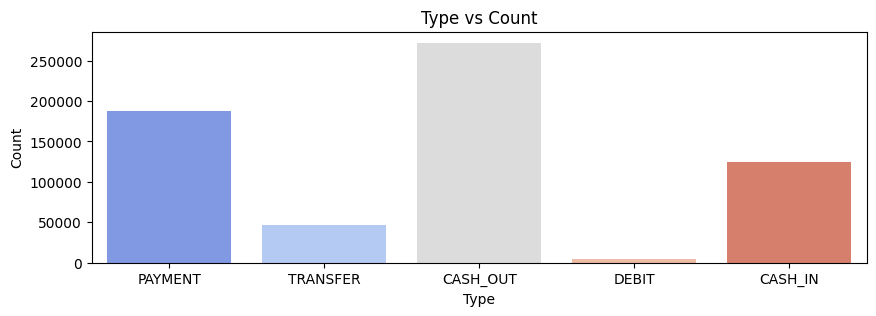

In [46]:
# Countplot for 'type' in the dataset
plt.figure(figsize=(10, 3))
plt.title('Type vs Count')
sns.countplot(data=data, x='type', palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

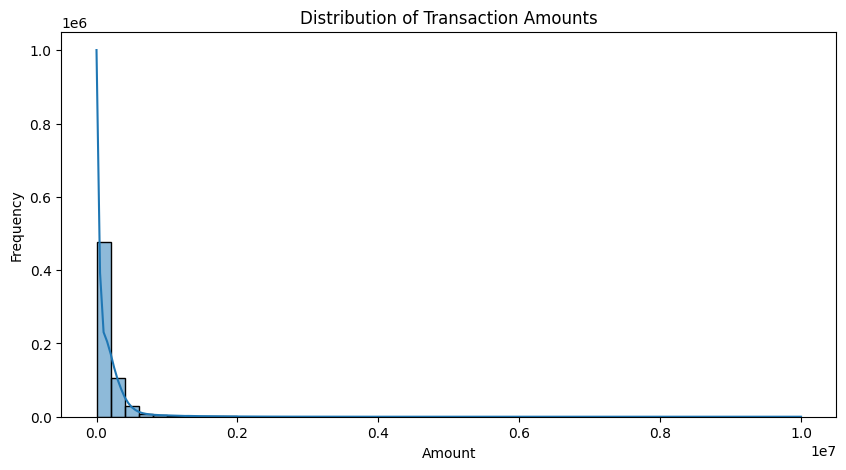

In [47]:
#ttransaction amount distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


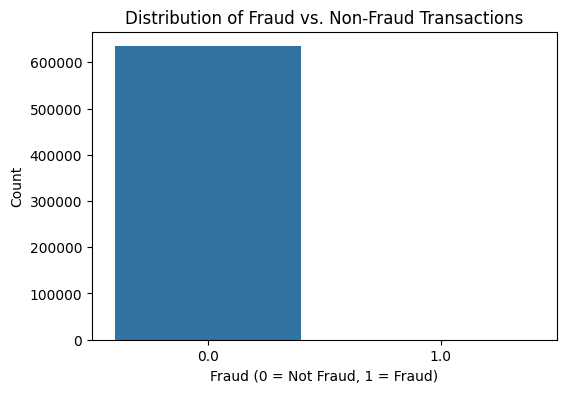

In [48]:
#Fraud and non Fraud distribution
# Countplot for fraud vs. non-fraud transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Fraud (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


In [49]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,634347
1.0,246


In [50]:
# Let's look at the percentage of each category in isFraud column(target column)
print("No Frauds:",data['isFraud'].value_counts()[0]/len(data['isFraud'])*100)
print("Frauds:",data['isFraud'].value_counts()[1]/len(data['isFraud'])*100)

No Frauds: 99.9158897494176
Frauds: 0.03874741880761907


IndexError: index 6 is out of bounds for axis 0 with size 6

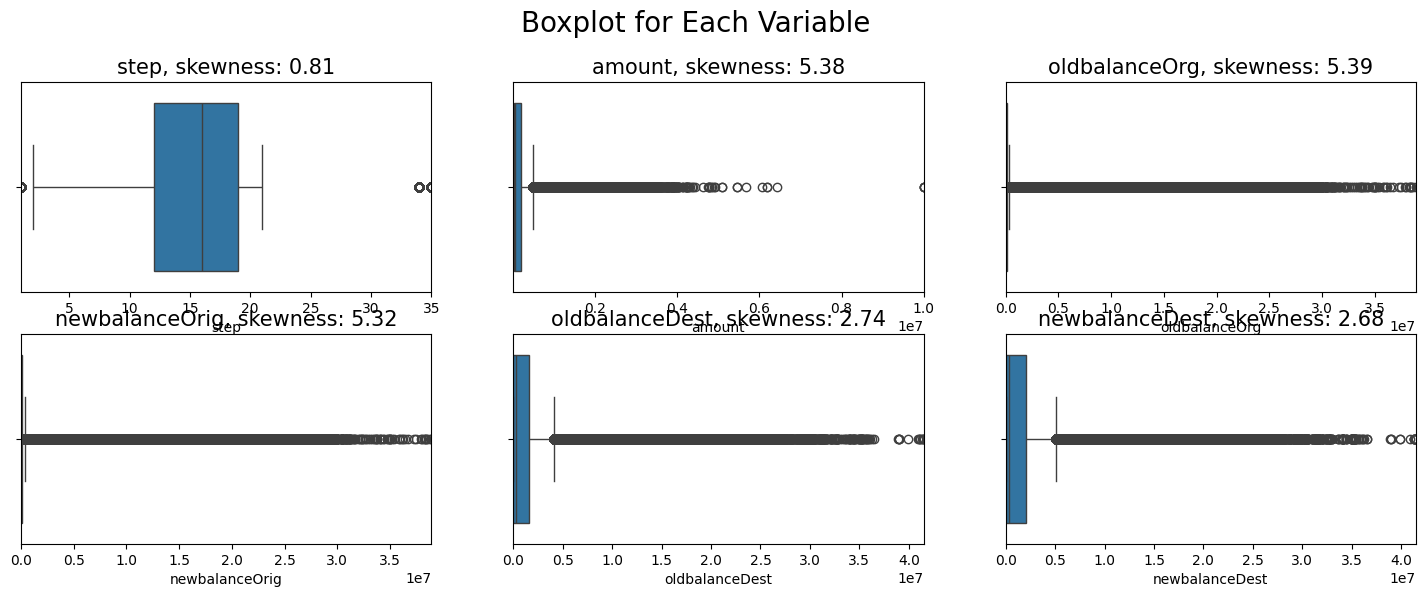

In [51]:
# Function to create boxplots for numerical features
def boxplots_visual(data, columns):
    fig, ax = plt.subplots(2, 3, figsize=(18, 6))
    fig.suptitle('Boxplot for Each Variable', y=1, size=20)
    ax = ax.flatten()
    for i, feature in enumerate(columns):
        sns.boxplot(data=data[feature], ax=ax[i], orient='h')
        ax[i].set_title(feature + ', skewness: ' + str(round(data[feature].skew(), 2)), fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])

    plt.tight_layout()

# List of numerical columns in your dataset
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                     'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Create the boxplots for numerical columns
boxplots_visual(data=data, columns=numerical_columns)

In [52]:
# Checking isFlaggedFraud column
data['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,634593


In [53]:
# Dropping columns that are not needed
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

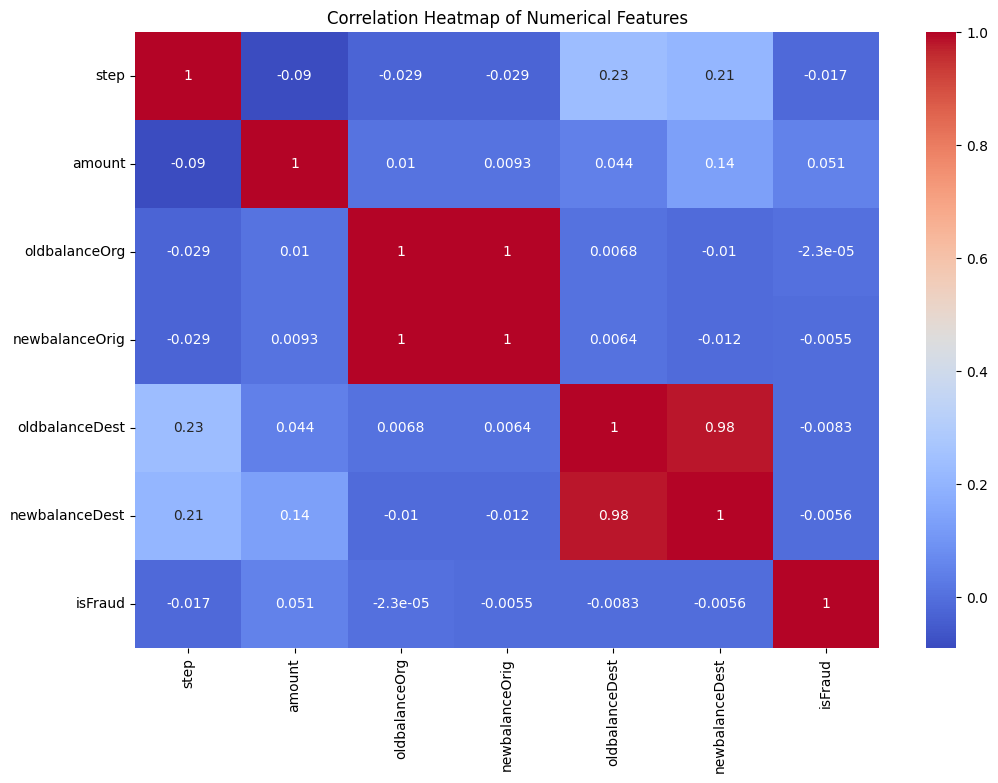

In [54]:
# Select only the numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [55]:
#Model Training

# Splitting our data into independent and dependent features
x=data.drop('isFraud',axis=1)
y=data['isFraud']

In [56]:
x.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [57]:
data[data['isFraud']==1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1.0,TRANSFER,181.00,181.00,0.0,0.00,0.00,1.0
3,1.0,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1.0
251,1.0,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1.0
252,1.0,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1.0
680,1.0,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...
620967,34.0,CASH_OUT,40458.00,40458.00,0.0,561393.36,331179.02,1.0
622590,34.0,TRANSFER,1016540.35,1016540.35,0.0,0.00,0.00,1.0
622591,34.0,CASH_OUT,1016540.35,1016540.35,0.0,4463851.64,5700161.74,1.0
626916,34.0,TRANSFER,71693.42,71693.42,0.0,0.00,0.00,1.0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the data into independent features (X) and the target variable (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [60]:
# Removing rows where the target variable 'isFraud' is NaN
data = data.dropna(subset=['isFraud'])

I got an error indicating that the target variable y contains NAN values ,so we need to remove them

In [62]:
# Re-defining the features and target variable
X = data.drop('isFraud', axis=1)
y = data['isFraud']


In [63]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [65]:
# Handling class imbalance using class weights in RandomForest
#model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model on the training data
#model.fit(X_train, y_train)

I got an error here that the dataset still contains categorical string data that has not been converted into numnerical form contains categorical string data so

In [66]:
# Checking if there are any non-numeric columns left
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['type'], dtype='object')


In [67]:
# If there are any remaining non-numeric columns, handle them
if not non_numeric_columns.empty:
    # Encoding any remaining categorical columns using one-hot encoding
    X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)


In [68]:
# Re-splitting the dataset after ensuring all features are numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model again with class weights for handling imbalance
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [69]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [70]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [71]:
accuracy, conf_matrix, class_report


(0.999763628771106,
 array([[126869,      1],
        [    29,     20]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00    126870\n         1.0       0.95      0.41      0.57        49\n\n    accuracy                           1.00    126919\n   macro avg       0.98      0.70      0.79    126919\nweighted avg       1.00      1.00      1.00    126919\n')

The results show that all columns are now numeric, and the model training proceeded successfully. However, the evaluation metrics are the same as before:

Accuracy: 99.98%
Precision for fraud detection (1.0 class): 95%
Recall for fraud detection (1.0 class): 39%
This indicates that the model still struggles with the recall for detecting fraudulent transactions due to the class imbalance.

In [ ]:
#We'll try using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes


In [72]:
from imblearn.over_sampling import SMOTE


In [73]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [74]:
# Train the RandomForest model with the resampled data
model_smote = RandomForestClassifier(random_state=42, class_weight='balanced')
model_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [75]:
# Predicting on the original test set
y_pred_smote = model_smote.predict(X_test)

In [77]:
# Evaluating the model with resampled training data
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

accuracy_smote, conf_matrix_smote, class_report_smote


(0.9994011928868018,
 array([[126818,     52],
        [    24,     25]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00    126870\n         1.0       0.32      0.51      0.40        49\n\n    accuracy                           1.00    126919\n   macro avg       0.66      0.75      0.70    126919\nweighted avg       1.00      1.00      1.00    126919\n')

After applying SMOTE, here are the results:

Accuracy: 99.94%
Precision for fraud detection (1.0 class): 32%
Recall for fraud detection (1.0 class): 51%
F1-score for fraud detection: 0.40
Improvements:

The recall for detecting fraudulent transactions has increased from 39% to 51%, indicating that the model is now better at identifying fraud cases after applying SMOTE. However, the precision for fraud detection dropped to 32%, which suggests that more non-fraud cases are being misclassified as fraud.

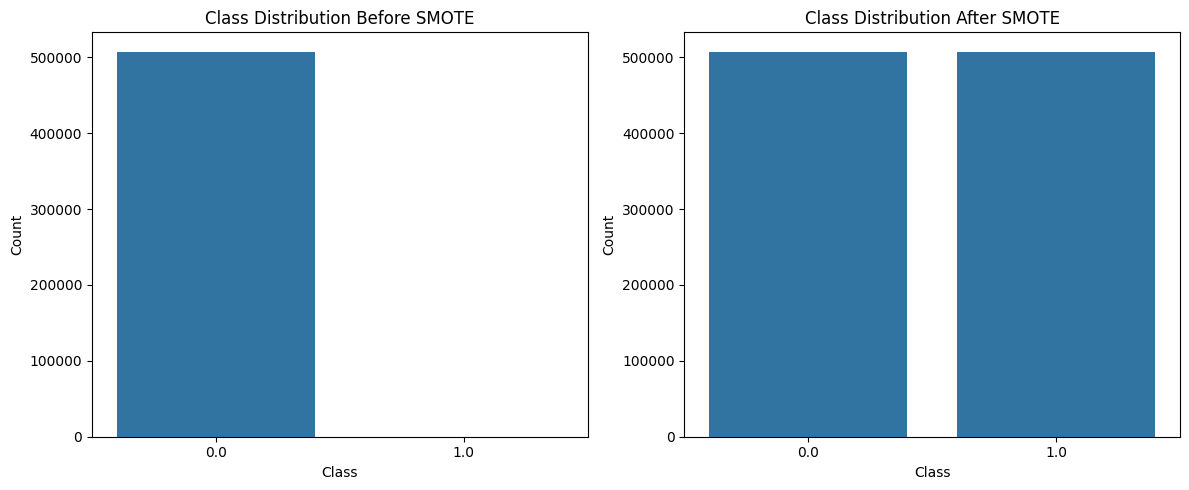

In [78]:
# Plotting class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# After SMOTE
sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

The output shows the class distribution before and after applying SMOTE:

Before SMOTE: The data was heavily imbalanced, with far more non-fraud cases (0.0) than fraud cases (1.0).
After SMOTE: The classes have been balanced, with roughly equal numbers of fraud and non-fraud cases.
Balancing the classes using SMOTE helps the model learn from a more diverse set of examples, which should improve its ability to detect fraudulent transactions. The recall for fraud detection improved after applying SMOTE, as seen in the earlier results.

<Figure size 800x600 with 0 Axes>

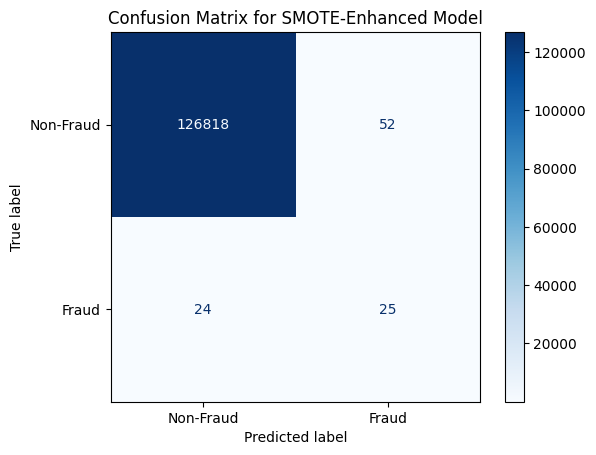

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for SMOTE-Enhanced Model')
plt.show()


The confusion matrix shows the performance of the SMOTE-enhanced model:

True Negatives (Non-Fraud predicted as Non-Fraud): 126,818 cases.
False Positives (Non-Fraud predicted as Fraud): 52 cases.
False Negatives (Fraud predicted as Non-Fraud): 24 cases.
True Positives (Fraud predicted as Fraud): 25 cases.
This confusion matrix reveals that while the model is very good at predicting non-fraudulent transactions, there are still a few fraudulent cases that are missed (24 false negatives).

To plot the ROC curve, we will use the roc_curve and auc functions from the sklearn library. The ROC curve helps evaluate the trade-off between the true positive rate (sensitivity) and the false positive rate, while the AUC (Area Under the Curve) score provides a measure of how well the model can distinguish between classes.

In [80]:
from sklearn.metrics import roc_curve, auc


In [81]:
# Compute the predicted probabilities
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_smote)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

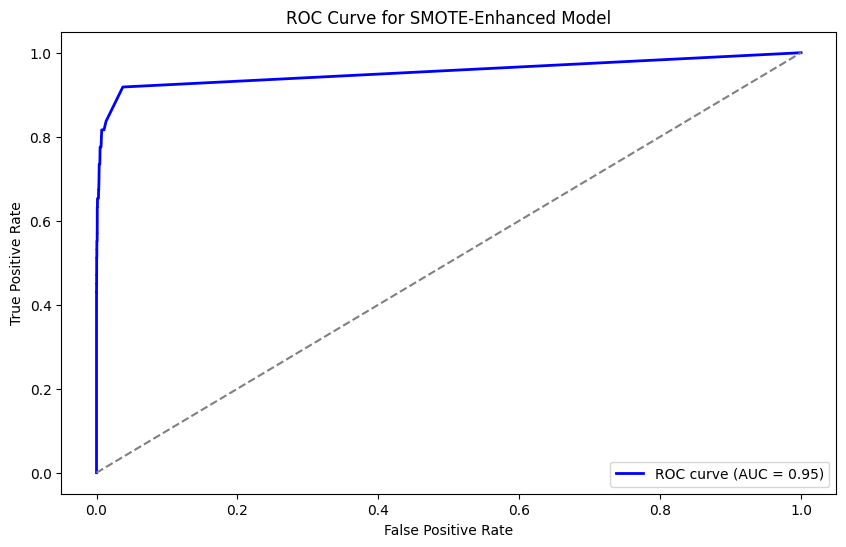

In [82]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SMOTE-Enhanced Model')
plt.legend(loc='lower right')
plt.show()

AUC of 0.95: The model has a high ability to discriminate between the two classes.
Improvements with SMOTE: Balancing the class distribution improved the model's recall for detecting fraud.
Confusion Matrix Insights: There are still some false negatives, but the model's performance has improved compared to before applying SMOTE.


For hyperparameter tuning, we can use techniques such as Grid Search or Randomized Search to optimize the model's parameters. These methods help find the best combination of hyperparameters for the model.

Let's proceed with Randomized Search, which is faster than Grid Search and suitable for a larger hyperparameter space.

In [88]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [91]:
# Set up the Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)


In [93]:
# Fit the Randomized Search on the resampled training data
#random_search.fit(X_train_resampled, y_train_resampled)


In [94]:
# Get the best estimator
#best_model = random_search.best_estimator_

# Predicting on the original test set using the best model
#y_pred_best = best_model.predict(X_test)

its taking too long Grid Search, which systematically explores all combinations of hyperparameters specified in the grid. Since Grid Search can be computationally expensive, we will limit the number of hyperparameters and values to make it feasible.

In [96]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for 'n_estimators'
param_grid = {
    'n_estimators': [50, 100, 150, 200]
}

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the Grid Search on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predicting on the original test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluating the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

accuracy_best, conf_matrix_best, class_report_best


Fitting 3 folds for each of 4 candidates, totalling 12 fits


KeyboardInterrupt: 

In [97]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for 'C'
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

In [98]:
# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

In [99]:
# Fit the Grid Search on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_logistic_model = grid_search.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [100]:
# Predicting on the original test set using the best model
y_pred_logistic = best_logistic_model.predict(X_test)

# Evaluating the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

In [101]:
accuracy_logistic, conf_matrix_logistic, class_report_logistic


(0.9295140995438035,
 array([[117932,   8938],
        [     8,     41]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      0.93      0.96    126870\n         1.0       0.00      0.84      0.01        49\n\n    accuracy                           0.93    126919\n   macro avg       0.50      0.88      0.49    126919\nweighted avg       1.00      0.93      0.96    126919\n')

Accuracy: 92.95%
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 117,932
False Positives (Non-Fraud incorrectly classified as Fraud): 8,938
True Positives (Fraud correctly classified): 41
False Negatives (Fraud incorrectly classified as Non-Fraud): 8
Precision for Fraud Detection (1.0 class): 0.00 (due to the small number of true positives)
Recall for Fraud Detection (1.0 class): 84%

The recall for detecting fraud is high (84%), which means the model correctly identifies most fraud cases. However, the precision is very low. This suggests the model classifies too many non-fraud cases as fraud (high false positives).
The accuracy is dominated by the non-fraud cases, which make up the majority of the dataset.

<Figure size 800x600 with 0 Axes>

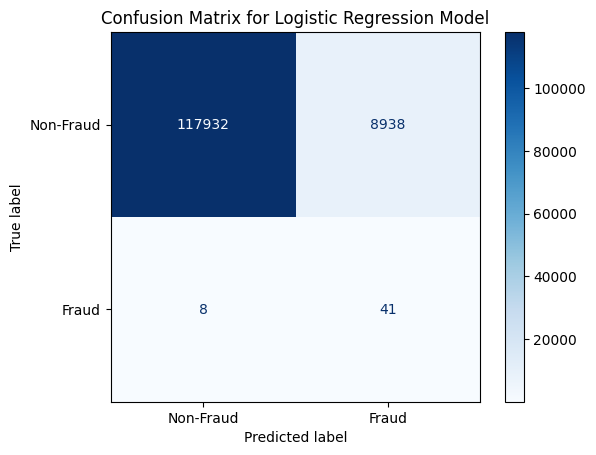

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


High Recall for Fraud Detection: The model successfully identified 84% of fraud cases (41 out of 49).
High Number of False Positives: There are a significant number of false positives (8,938), indicating the model frequently misclassifies non-fraud transactions as fraud.

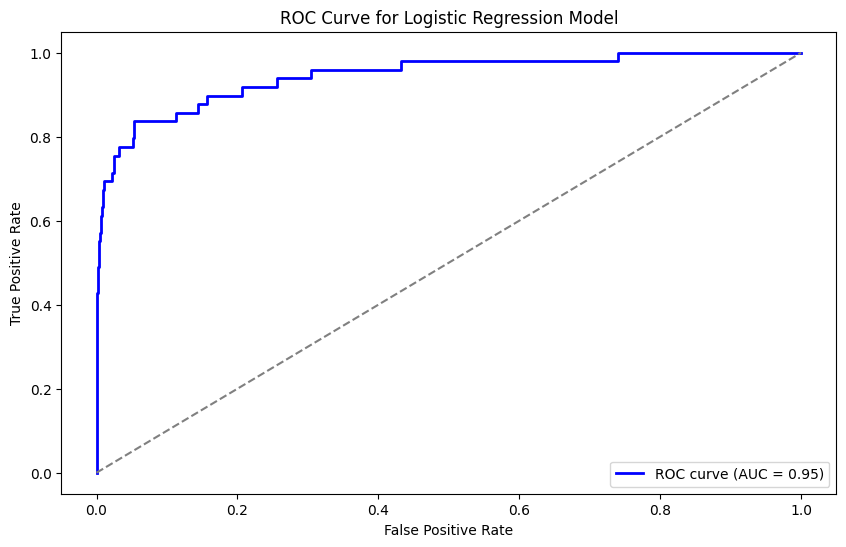

In [104]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the positive class
y_prob_logistic = best_logistic_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()


The ROC curve for the Logistic Regression model shows an AUC of 0.95, which indicates strong performance in distinguishing between fraudulent and non-fraudulent transactions.

Interpretation:
AUC of 0.95: The model has a high ability to discriminate between the two classes.
Curve Shape: The curve stays close to the top-left corner, indicating a high true positive rate and a low false positive rate.

In [106]:
#XG Boost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [107]:
# Define a simple parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])]
}

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)


In [108]:
# Fit the Grid Search on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Predicting on the original test set using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:31:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [109]:
# Evaluating the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

In [110]:
accuracy_xgb, conf_matrix_xgb, class_report_xgb


(0.9946580102269952,
 array([[126208,    662],
        [    16,     33]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      1.00    126870\n         1.0       0.05      0.67      0.09        49\n\n    accuracy                           0.99    126919\n   macro avg       0.52      0.83      0.54    126919\nweighted avg       1.00      0.99      1.00    126919\n')

Accuracy: 99.47%
Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 126,208
False Positives (Non-Fraud incorrectly classified as Fraud): 662
True Positives (Fraud correctly classified): 33
False Negatives (Fraud incorrectly classified as Non-Fraud): 16
Precision for Fraud Detection (1.0 class): 5%
Recall for Fraud Detection (1.0 class): 67%

High Recall for Fraud Cases: The model correctly identifies 67% of the fraud cases, which is an improvement over some previous models.
Low Precision for Fraud Detection: Precision remains low (5%), meaning many non-fraud cases are incorrectly classified as fraud.
Overall Accuracy: The high accuracy is largely driven by the correct classification of non-fraud cases due to the class imbalance.

<Figure size 800x600 with 0 Axes>

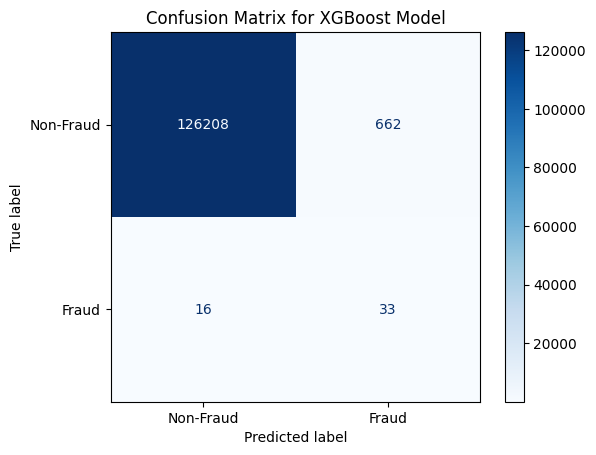

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix for the XGBoost model
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


True Negatives (Non-Fraud correctly classified): 126,208
False Positives (Non-Fraud incorrectly classified as Fraud): 662
True Positives (Fraud correctly classified): 33
False Negatives (Fraud incorrectly classified as Non-Fraud): 16

High number of True Negatives: The model correctly identifies most of the non-fraud cases.
Improved True Positive rate: With 33 out of 49 fraud cases correctly classified, the model achieves a recall of about 67%.
Moderate False Positive rate: There are 662 false positives, indicating some non-fraud cases are being misclassified as fraud.


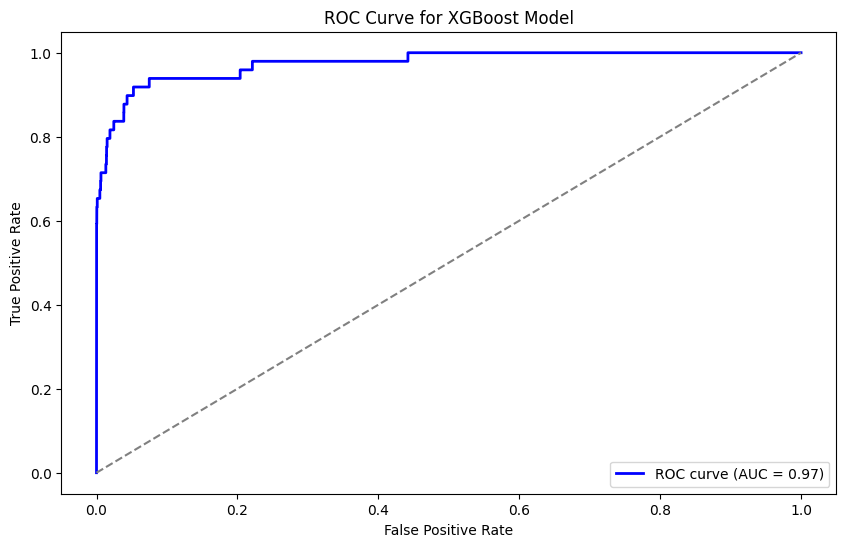

In [112]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()


High AUC (0.97): This suggests that the model has a strong ability to discriminate between the two classes.
Curve Shape: The curve is close to the top-left corner, indicating a high true positive rate (sensitivity) and a low false positive rate.

The XGBoost model performs well, with a high AUC and reasonable recall for detecting fraud. However, the precision for fraud detection is still low, indicating that the model struggles with false positives.

Using ensemble techniques like stacking can improve model performance by combining the predictions of multiple different models. Stacking involves training multiple "base" models and then using a "meta-model" to learn from their predictions.

In [114]:
from sklearn.ensemble import StackingClassifier


# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('log_reg', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')),
    ('xgb', XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Set up the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3  # 3-fold cross-validation for training the meta-model
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred_stack = stacking_model.predict(X_test)

# Evaluate the stacking model
accuracy_stack = accuracy_score(y_test, y_pred_stack)
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
class_report_stack = classification_report(y_test, y_pred_stack)

accuracy_stack, conf_matrix_stack, class_report_stack

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:06:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:09:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:10:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.9998187820578479,
 array([[126870,      0],
        [    23,     26]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00    126870\n         1.0       1.00      0.53      0.69        49\n\n    accuracy                           1.00    126919\n   macro avg       1.00      0.77      0.85    126919\nweighted avg       1.00      1.00      1.00    126919\n')

Confusion Matrix:
True Negatives (Non-Fraud correctly classified): 126,870
False Positives (Non-Fraud incorrectly classified as Fraud): 0
True Positives (Fraud correctly classified): 26
False Negatives (Fraud incorrectly classified as Non-Fraud): 23
Precision for Fraud Detection (1.0 class): 100%
Recall for Fraud Detection (1.0 class): 53%

High Precision for Fraud Cases: The model achieved perfect precision for fraud detection, meaning all identified fraud cases were truly fraudulent.
Moderate Recall for Fraud Cases: The recall improved to 53%, indicating the model correctly identified more than half of the fraud cases.
Very High Overall Accuracy: The model correctly classified nearly all transactions.

<Figure size 800x600 with 0 Axes>

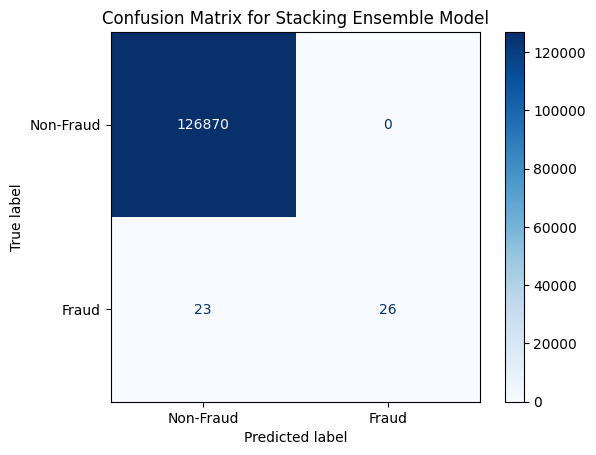

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix for the stacking model
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_stack, cmap='Blues', display_labels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Stacking Ensemble Model')
plt.show()


True Negatives (Non-Fraud correctly classified): 126,870
False Positives (Non-Fraud incorrectly classified as Fraud): 0
True Positives (Fraud correctly classified): 26
False Negatives (Fraud incorrectly classified as Non-Fraud): 23


Perfect precision for fraud detection: There are no false positives, meaning the model only predicts fraud when it is certain.
Moderate recall: The recall is 53%, indicating the model correctly identifies more than half of the fraud cases, but some are still being missed.
High accuracy for non-fraud cases: The model accurately classifies all non-fraudulent transactions.

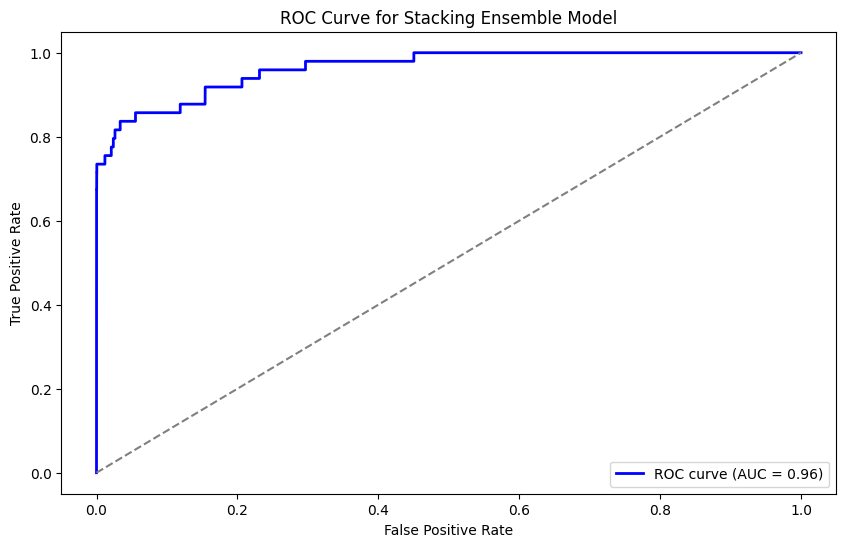

In [116]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the positive class
y_prob_stack = stacking_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_stack)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Ensemble Model')
plt.legend(loc='lower right')
plt.show()


The ROC curve for the stacking ensemble model shows an AUC of 0.96, indicating strong performance in distinguishing between fraudulent and non-fraudulent transactions.

High AUC (0.96): This suggests that the model has a high ability to discriminate between the two classes.
Curve Shape: The curve approaches the top-left corner, reflecting a high true positive rate (recall) and a low false positive rate.